In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np 
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [3]:
df =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/df_finalnews247.csv')

In [4]:
df.set_index('Unnamed: 0' , inplace=True)

In [5]:
df

,Link,Title,Date,Summary,Text,Tag
Unnamed: 0,,,,,,
0,https://www.news247.gr/politiki/mitsotakis-pre...,"Μητσοτάκης: ""Πρέπει να προσαρμόσουμε την αγορά...",05 Μαΐου 2021 13:52,"“Αφήσαμε την κρίση πίσω μας για τα καλά”, υποσ...",\nΣτη συνέχιση των μεταρρυθμίσεων επέμεινε ο π...,ΚΥΡΙΑΚΟΣ ΜΗΤΣΟΤΑΚΗΣ
1,https://www.news247.gr/politiki/symmetochi-toy...,Συμμετοχή του Μητσοτάκη στην τηλεδιάσκεψη των ...,05 Μαΐου 2021 11:48,Οι ηγέτες αντάλλαξαν απόψεις για την επιδημιολ...,\nΟ Πρωθυπουργός Κυριάκος Μητσοτάκης έλαβε μέρ...,ΚΥΡΙΑΚΟΣ ΜΗΤΣΟΤΑΚΗΣ
2,https://www.news247.gr/koinonia/arsi-metron-i-...,Άρση μέτρων: Η εστίαση είναι εδώ: Τι θα γίνει ...,05 Μαΐου 2021 11:05,Τα επόμενα βήματα για την επιστροφή στην κανον...,\nΣε ρυθμούς... κανονικότητας επανέρχεται σταδ...,ΑΡΣΗ ΜΕΤΡΩΝ
3,https://www.news247.gr/koinonia/grigorakos-eme...,"Λεωνίδας Γρηγοράκος: ""Έμεινα διασωληνωμένος δύ...",05 Μαΐου 2021 10:15,"Για την εξαντλητική μάχη του με τον κορονοϊό, ...",\nΓια τον εφιάλτη που βίωσε δίνοντας μάχη με τ...,ΚΟΡΟΝΟΪΟΣ
4,https://www.news247.gr/oikonomia/to-ypsilo-kos...,Το υψηλό κόστος των τεστ PCR φρενάρει τα αεροπ...,05 Μαΐου 2021 10:12,Εκκληση της Διεθνούς Ένωσης Αεροπορικών Μεταφο...,\nΟσοι έχουν γνωστούς που έρχονται από το εξωτ...,ΚΟΡΟΝΟΪΟΣ
...,...,...,...,...,...,...
7353,https://www.news247.gr/koinonia/estiasi-me-pel...,Εστίαση: Με πελάτες στα καταστήματα μετά από έ...,03 Μαΐου 2021 13:45,"Άνοιξαν την Δευτέρα του Πάσχα τα μπαρ, εστιατό...",\nΤις πόρτες τους άνοιξαν και πάλι από τη Δευτ...,ΕΣΤΙΑΣΗ
7354,https://www.news247.gr/koinonia/theodoros-kats...,Θεόδωρος Κατσανέβας: Διασωληνωμένος με κορονοϊ...,03 Μαΐου 2021 11:07,"Ο πρώην βουλευτής του ΠΑΣΟΚ, Θεόδωρος Κατσανέβ...",\nΔιασωληνώθηκε ο 74χρονος καθηγητής του Πανεπ...,ΚΟΡΟΝΟΪΟΣ
7355,https://www.news247.gr/politiki/deytera-politi...,Η πολιτική στη δίνη της πανδημίας,03 Μαΐου 2021 11:03,To NEWS 24/7 συζητά με τον πολιτικό αναλυτή τη...,\nΜε τον πλανήτη να κινείται για περισσότερο α...,ΚΟΡΟΝΟΪΟΣ


In [6]:
articlesMay = df[df['Date'].str.contains ('Μαΐου')]

In [7]:
articlesMay22 = articlesMay[articlesMay['Date'].str.contains ('2022')]

In [8]:
articlesMay22

,Link,Title,Date,Summary,Text,Tag
Unnamed: 0,,,,,,
258,https://www.news247.gr/koinonia/.9649949.html,Κορονοϊός - Διασπορά: Στην Αττική εντοπίζονται...,31 Μαΐου 2022 15:57,Πώς κατανέμονται γεωγραφικά τα 5.080 νέα κρούσ...,\nΣτα 5.080 ανέρχονται τα κρούσματα του κορονο...,ΚΡΟΥΣΜΑΤΑ
259,https://www.news247.gr/koinonia/koronoios-3-28...,Κορονοϊός: 3.284 νέα κρούσματα σήμερα στην Αττική,31 Μαΐου 2022 15:52,Αναλυτικά η γεωγραφική κατανομή των 5.080 νέων...,\nΟ Εθνικός Οργανισμός Δημόσιας Υγείας (ΕΟΔΥ) ...,ΚΡΟΥΣΜΑΤΑ
260,https://www.news247.gr/koinonia/.9649951.html,Κορονοϊός: 321 νέα κρούσματα σήμερα στη Θεσσαλ...,31 Μαΐου 2022 15:51,Τα κρούσματα κορονοϊού που εντοπίστηκαν στη Θε...,\nΠαραμένει υψηλός ο αριθμός των νέων μολύνσεω...,ΚΡΟΥΣΜΑΤΑ
261,https://www.news247.gr/ygeia/koronoios-5-080-n...,Κορονοϊός: 5.080 νέα κρούσματα σήμερα στην Ελλ...,31 Μαΐου 2022 15:50,5.080 νέα κρούσματα σήμερα στην Ελλάδα ανακοίν...,\nΟ Εθνικός Οργανισμός Δημόσιας Υγείας (ΕΟΔΥ) ...,ΕΟΔΥ
262,https://www.news247.gr/koinonia/koronoios-dias...,Κορονοϊός - Διασπορά: Στα μεγάλα αστικά κέντρα...,30 Μαΐου 2022 15:58,Πώς κατανέμονται γεωγραφικά τα 2.400 νέα κρούσ...,\nΣτα 2.400 ανέρχονται τα κρούσματα του κορονο...,ΚΡΟΥΣΜΑΤΑ
...,...,...,...,...,...,...
452,https://www.news247.gr/koinonia/.9615508.html,Κορονοϊός: 518 νέα κρούσματα σήμερα στη Θεσσαλ...,01 Μαΐου 2022 15:37,Τα κρούσματα κορονοϊού που εντοπίστηκαν στη Θε...,\nΠαραμένει υψηλός ο αριθμός των νέων μολύνσεω...,ΚΟΡΟΝΟΪΟΣ
453,https://www.news247.gr/koinonia/.9615509.html,Κορονοϊός: 1.928 νέα κρούσματα σήμερα στην Αττική,01 Μαΐου 2022 15:37,Αναλυτικά η γεωγραφική κατανομή των 1.928 νέων...,\nΟ Εθνικός Οργανισμός Δημόσιας Υγείας (ΕΟΔΥ) ...,ΚΟΡΟΝΟΪΟΣ
454,https://www.news247.gr/ygeia/.9615510.html,Κορονοϊός: 4.701 νέα κρούσματα στην Ελλάδα - 2...,01 Μαΐου 2022 15:36,4.701 νέα κρούσματα σήμερα στην Ελλάδα ανακοίν...,\nΟ Εθνικός Οργανισμός Δημόσιας Υγείας (ΕΟΔΥ) ...,ΚΟΡΟΝΟΪΟΣ


In [9]:
text = articlesMay22['Summary'].str.cat(sep = ' ').replace("amp", ' ')

In [10]:
text

'Πώς κατανέμονται γεωγραφικά τα 5.080 νέα κρούσματα που ανακοίνωσε την Τρίτη ο ΕΟΔΥ. Αναλυτικά η γεωγραφική κατανομή των 5.080 νέων κρουσμάτων στην Αττική την Τρίτη. Τα κρούσματα κορονοϊού που εντοπίστηκαν στη Θεσσαλονίκη είναι 321 σε ένα 24ωρο, από το σύνολο των 5.080 που καταγράφηκαν στη χώρα σύμφωνα με τον ΕΟΔΥ. 5.080 νέα κρούσματα σήμερα στην Ελλάδα ανακοίνωσε ο ΕΟΔΥ. 130 διασωληνώσεις, 12 θάνατοι συμπολιτών μας από κορονοϊό. Ποια είναι η κατάσταση σε Αττική και Θεσσαλονίκη. Πώς κατανέμονται γεωγραφικά τα 2.400 νέα κρούσματα που ανακοίνωσε τη Δευτέρα ο ΕΟΔΥ. Τα κρούσματα κορονοϊού που εντοπίστηκαν στη Θεσσαλονίκη είναι 168 σε ένα 24ωρο, από το σύνολο των 2.400 που καταγράφηκαν στη χώρα σύμφωνα με τον ΕΟΔΥ. Αναλυτικά η γεωγραφική κατανομή των 1.461 νέων κρουσμάτων στην Αττική τη Δευτέρα. 2.400 νέα κρούσματα σήμερα στην Ελλάδα ανακοίνωσε ο ΕΟΔΥ. 130 διασωληνώσεις και 21 θάνατοι συμπολιτών μας από κορονοϊό. Ποια είναι η κατάσταση σε Αττική και Θεσσαλονίκη. Ενώ οι περιορισμοί αρχίζουν 

In [11]:
import spacy

In [12]:
!python -m spacy download el_core_news_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.6 MB 15.5 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')


In [13]:
nlp = spacy.load('el_core_news_sm')

In [14]:
list(nlp.Defaults.stop_words)[0:20]

['εκείνη',
 'καμίας',
 'με',
 'καθένας',
 'ήδη',
 'ολότελα',
 'μακάρι',
 'κακά',
 'βέβαια',
 'όλην',
 'δικούς',
 'οποία',
 'τότε',
 'έκαστην',
 'πολλούς',
 'στο',
 'κάμποσα',
 'κανείς',
 'μετά',
 'έκανε']

In [15]:
full_doc = nlp(text)

In [16]:
clear_text = ' '.join(token.lemma_ for token in full_doc)

In [17]:
clear_text[200:400]

'σσαλονίκη είμαι 321 σε ένας 24ωρο , από ο σύνολο ο 5.080 που καταγράφηκαν σε ο χώρα σύμφωνα με ο ΕΟΔΥ . 5.080 νέος κρούσμα σήμερα σε ο Ελλάδα ανακοινώνω ο ΕΟΔΥ . 130 διασωληνώσεις , 12 θάνατος συμπολι'

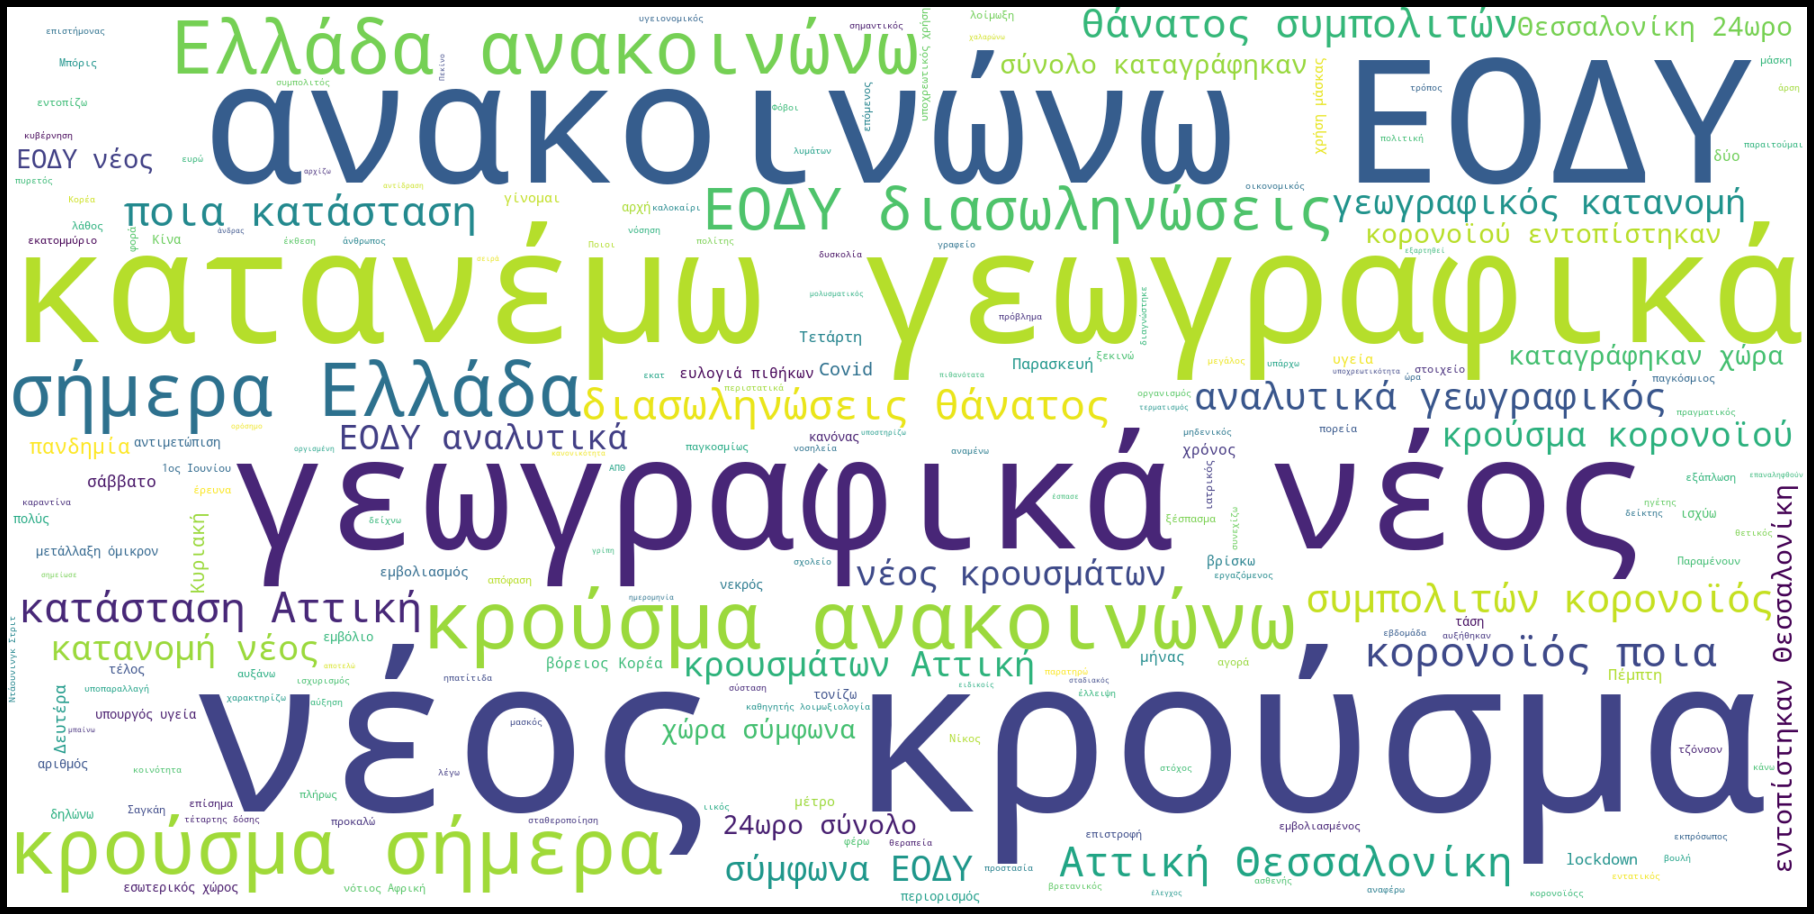

In [35]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'white'
 ).generate(clear_text)
fig = plt.figure(
    figsize = (25, 15),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [20]:
count_vector = cv.fit_transform(articlesMay22['Summary'])

In [21]:
count_vector.shape

(199, 1117)

In [22]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,01,015,02,03,04,048,05,06,066,...,όμικρον,όπου,όπως,όσα,όσοι,όσους,ότι,όχι,ώρα,ώρες
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)

In [24]:
count_vector = cv.fit_transform(articlesMay22['Summary'])

In [25]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,015,048,05,066,080,10,11,12,13,...,φορά,φόβοι,χρήση,χρειάστηκε,χρόνια,χρόνο,χώρα,χώρες,χώρους,όμικρον
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
from html import unescape
def my_tokenizer(doc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [27]:
 cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(articlesMay22['Summary'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έκασε ο', 'έτερα', 'έτερων', 'ήσω', 'ίσιος', 'αλλιώ', 'αλλιώτικος', 'αλλοιώ', 'αρκετός', 'γίνομαι', 'γρήγορο', 'διο', 'είχος', 'εαυτής', 'εαυτός', 'εκάστος', 'επόμενος', 'εσένος', 'ετέραις', 'ετού', 'ετούε ο', 'εχτής', 'ιδίο', 'κάνενς', 'κάνω', 'κανενό', 'λοιπός', 'μέλλω', 'μερικός', 'μπορώ', 'μόνας', 'ολωσδιόλος', 'ορισμένος', 'οριόμενσς', 'ποία', 'πολύς', 'προτός', 'προχτής', 'σε ο', 'ταύ', 'τουλάχισε ο', 'τρίτος', 'τός', 'χωριστό'] not in stop_words.
  % sorted(inconsistent)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,130,156,160,19/05,1ος,2.385,2.400,2.575,2.819,20/05,...,φορά,φόβος,χαρακτηρίζω,χρήση,χρειάζομαι,χρόνος,χώρα,χώρος,όμικρον,ώρα
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
 cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20) #, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(articlesMay22['Summary'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,ανακοίνωσε,αττική,γεωγραφικά,διασωληνώσεις,ελλάδα,εοδυ,θάνατοι,θεσσαλονίκη,κατάσταση,κατανέμονται,κορονοϊού,κορονοϊό,κρουσμάτων,κρούσματα,νέα,νέων,ποια,σήμερα,συμπολιτών,σύμφωνα
0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,1,0,1,1,1,1,1,1,0,0,1,0,1,1,0,1,1,1,0
4,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0


In [29]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(articlesMay22['Summary'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,κυβέρνηση,κυβερνήσεις,κυβερνητικός,κυριακή
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [30]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=30, ngram_range=(2, 2) ) #token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(articlesMay22['Summary'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,05 εοδυ,24ωρο σύνολο,covid 19,ανακοίνωσε δευτέρα,ανακοίνωσε εοδυ,ανακοίνωσε κυριακή,αναλυτικά γεωγραφική,αττική θεσσαλονίκη,αττική κυριακή,βόρεια κορέα,...,κρούσματα ανακοίνωσε,κρούσματα κορονοϊού,κρούσματα σήμερα,νέα κρούσματα,νέων κρουσμάτων,ποια κατάσταση,σήμερα ελλάδα,συμπολιτών κορονοϊό,σύμφωνα εοδυ,χώρα σύμφωνα
0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
3,0,0,0,0,1,0,0,1,0,0,...,0,0,1,1,0,1,1,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [31]:
results.sum(axis =0).sort_values(ascending = False)

νέα κρούσματα               61
ανακοίνωσε εοδυ             34
κατανέμονται γεωγραφικά     31
κρούσματα ανακοίνωσε        31
κατάσταση αττική            30
κορονοϊό ποια               30
συμπολιτών κορονοϊό         30
σήμερα ελλάδα               30
αττική θεσσαλονίκη          30
ποια κατάσταση              30
κρούσματα σήμερα            30
ελλάδα ανακοίνωσε           30
θάνατοι συμπολιτών          30
γεωγραφική κατανομή         26
κρουσμάτων αττική           26
νέων κρουσμάτων             26
αναλυτικά γεωγραφική        26
σύμφωνα εοδυ                26
κρούσματα κορονοϊού         25
καταγράφηκαν χώρα           25
χώρα σύμφωνα                25
κορονοϊού εντοπίστηκαν      25
24ωρο σύνολο                25
εντοπίστηκαν θεσσαλονίκη    25
05 εοδυ                     13
covid 19                     9
βόρεια κορέα                 6
αττική κυριακή               6
ανακοίνωσε κυριακή           5
ανακοίνωσε δευτέρα           5
dtype: int64

In [32]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head(20)  

νέα κρούσματα              61
ανακοίνωσε εοδυ            34
κατανέμονται γεωγραφικά    31
κρούσματα ανακοίνωσε       31
κατάσταση αττική           30
κορονοϊό ποια              30
συμπολιτών κορονοϊό        30
σήμερα ελλάδα              30
αττική θεσσαλονίκη         30
ποια κατάσταση             30
κρούσματα σήμερα           30
ελλάδα ανακοίνωσε          30
θάνατοι συμπολιτών         30
γεωγραφική κατανομή        26
κρουσμάτων αττική          26
νέων κρουσμάτων            26
αναλυτικά γεωγραφική       26
σύμφωνα εοδυ               26
κρούσματα κορονοϊού        25
καταγράφηκαν χώρα          25
dtype: int64

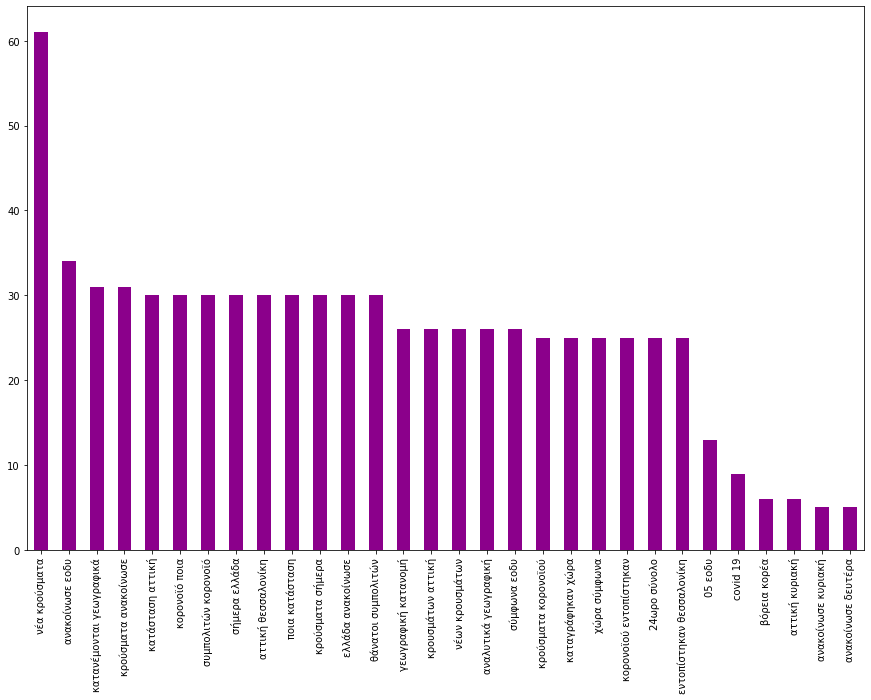

In [33]:
sum_words.sort_values(ascending = False).head(30).plot(kind = 'bar', figsize=(15,10), color='#8B008B')

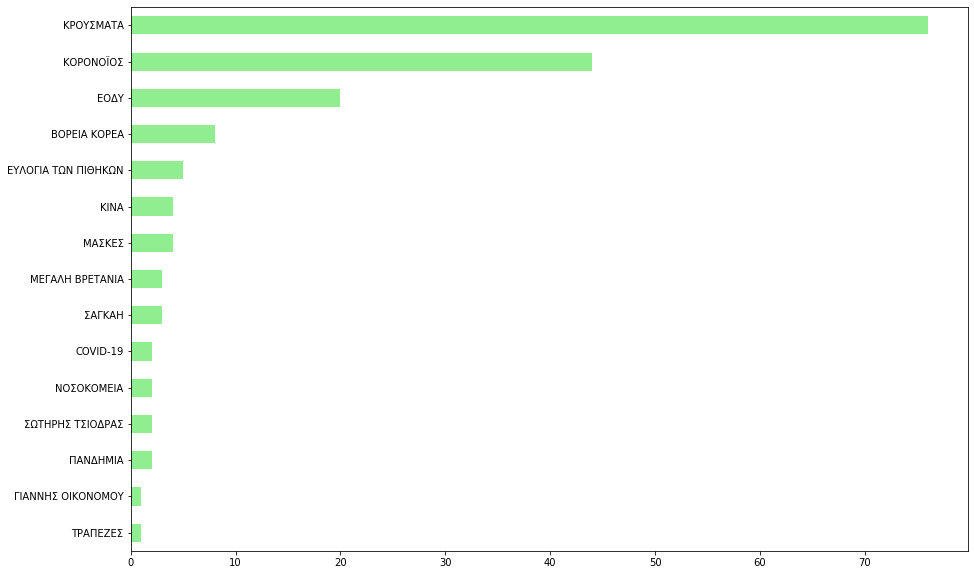

In [36]:
articlesMay22['Tag'].value_counts().head(15).sort_values().plot(kind='barh', figsize=(15,10), color='lightgreen')